**Base de dados escolhida:** Heart Attack Analysis & Prediction Dataset
- Disponível em: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

**Coluna alvo:** Output

**Objetivo do modelo:** Classificar se o paciente tem mais riscos de ter ataque cardíaco ou não.

**Justificativa da escolha:** Por ter família na área da saúde especializada em cardiologia, essa área da medicina é também do meu interesse. Decidi escolher esse dataset também para me familiarizar com as possíveis soluções envolvendo dados da saúde. Tenho interesse também em criar um modelo preditivo para classificar exames de eletrocardiografia, esse primeiro projeto pode servir como base e inspiração.

**Colunas do Dataset:**
*   Age : Idade do paciente
*   Sex : Sexo do paciente (1 = homem; 0 = mulher)
*   exng: Angina (dor no peito) induzida por exercício (1 = sim; 0 = não)
*   caa: número de vasos principais (varia entre 0-3)
*   cp : tipo de dor no peito
          Valor 1: angina típica
          Valor 2: angina atípica
          Valor 3: dor não-anginal
          Valor 4: assintomático
*   trtbps : pressão sanguínea em repouso em mm/Hg
*   chol : colesterol em mg/dl
*   fbs : (açucar no sangue em jejum > 120 mg/dl) (1 = verdadeiro; 0 = falso)
*    rest_ecg : resultado do ECG em repouso
          Valor 0: normal
          Valor 1: tendo anormalidade da onda ST-T
          Valor 2: mostrando hipertrofia ventricular esquerda provável ou definitiva
          Valor 4: assintomático
*   thalachh : maior frequência cardíaca alcançada
*   output : 0= menos chance de ter ataque cardíaco 1= mais chance de ter ataque cardíaco
*   thall : thalassemia (doença genética do sangue que se caracteriza por uma taxa de hemoglobina mais baixa do que o normal.)
           0 = null
           1 = defeito fixo
           2 = normal
           3 = defeito reversível
*   slp : a inclinação do pico do segmento ST (representa o intervalo entre a despolarização e a repolarização ventricular) do exercício
          0 = declive para cima
          1 = plano
          2 = declive para baixo


Import das bibliotecas que serão utilizadas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import itertools
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

Carregando conjunto de dados no dataframe DF

In [ ]:
df = pd.read_csv('/content/heart.csv')

df.head(100)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1


In [ ]:
df.value_counts('output')

output
1    165
0    138
dtype: int64

Descrição estatística do conjunto de dados

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Tabela infográfica do DF

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Conversão dos atributos

In [ ]:

# Convertendo os atributos categóricos
atributos_categoricos = np.array([['caa'],['cp'],['restecg'],['thall'],['slp']])

encoder = OneHotEncoder()
encoder.fit(atributos_categoricos)
encoder.transform(atributos_categoricos)

#Covertendo os valores dos atributos binários em valores binários
ord_enc = OrdinalEncoder()
df['fbs'] = ord_enc.fit_transform(df[['fbs']])
df['sex'] = ord_enc.fit_transform(df[['sex']])
df['exng'] = ord_enc.fit_transform(df[['exng']])
df['output'] = ord_enc.fit_transform(df[['output']])



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    float64
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    float64
dtypes: float64(5), int64(9)
memory usage: 33.3 KB


In [ ]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1.0,3,145,233,1.0,0,150,0.0,2.3,0,0,1,1.0
1,37,1.0,2,130,250,0.0,1,187,0.0,3.5,0,0,2,1.0
2,41,0.0,1,130,204,0.0,0,172,0.0,1.4,2,0,2,1.0
3,56,1.0,1,120,236,0.0,1,178,0.0,0.8,2,0,2,1.0
4,57,0.0,0,120,354,0.0,1,163,1.0,0.6,2,0,2,1.0
5,57,1.0,0,140,192,0.0,1,148,0.0,0.4,1,0,1,1.0
6,56,0.0,1,140,294,0.0,0,153,0.0,1.3,1,0,2,1.0
7,44,1.0,1,120,263,0.0,1,173,0.0,0.0,2,0,3,1.0
8,52,1.0,2,172,199,1.0,1,162,0.0,0.5,2,0,3,1.0
9,57,1.0,2,150,168,0.0,1,174,0.0,1.6,2,0,2,1.0


Visualização de Histogramas de cada Coluna

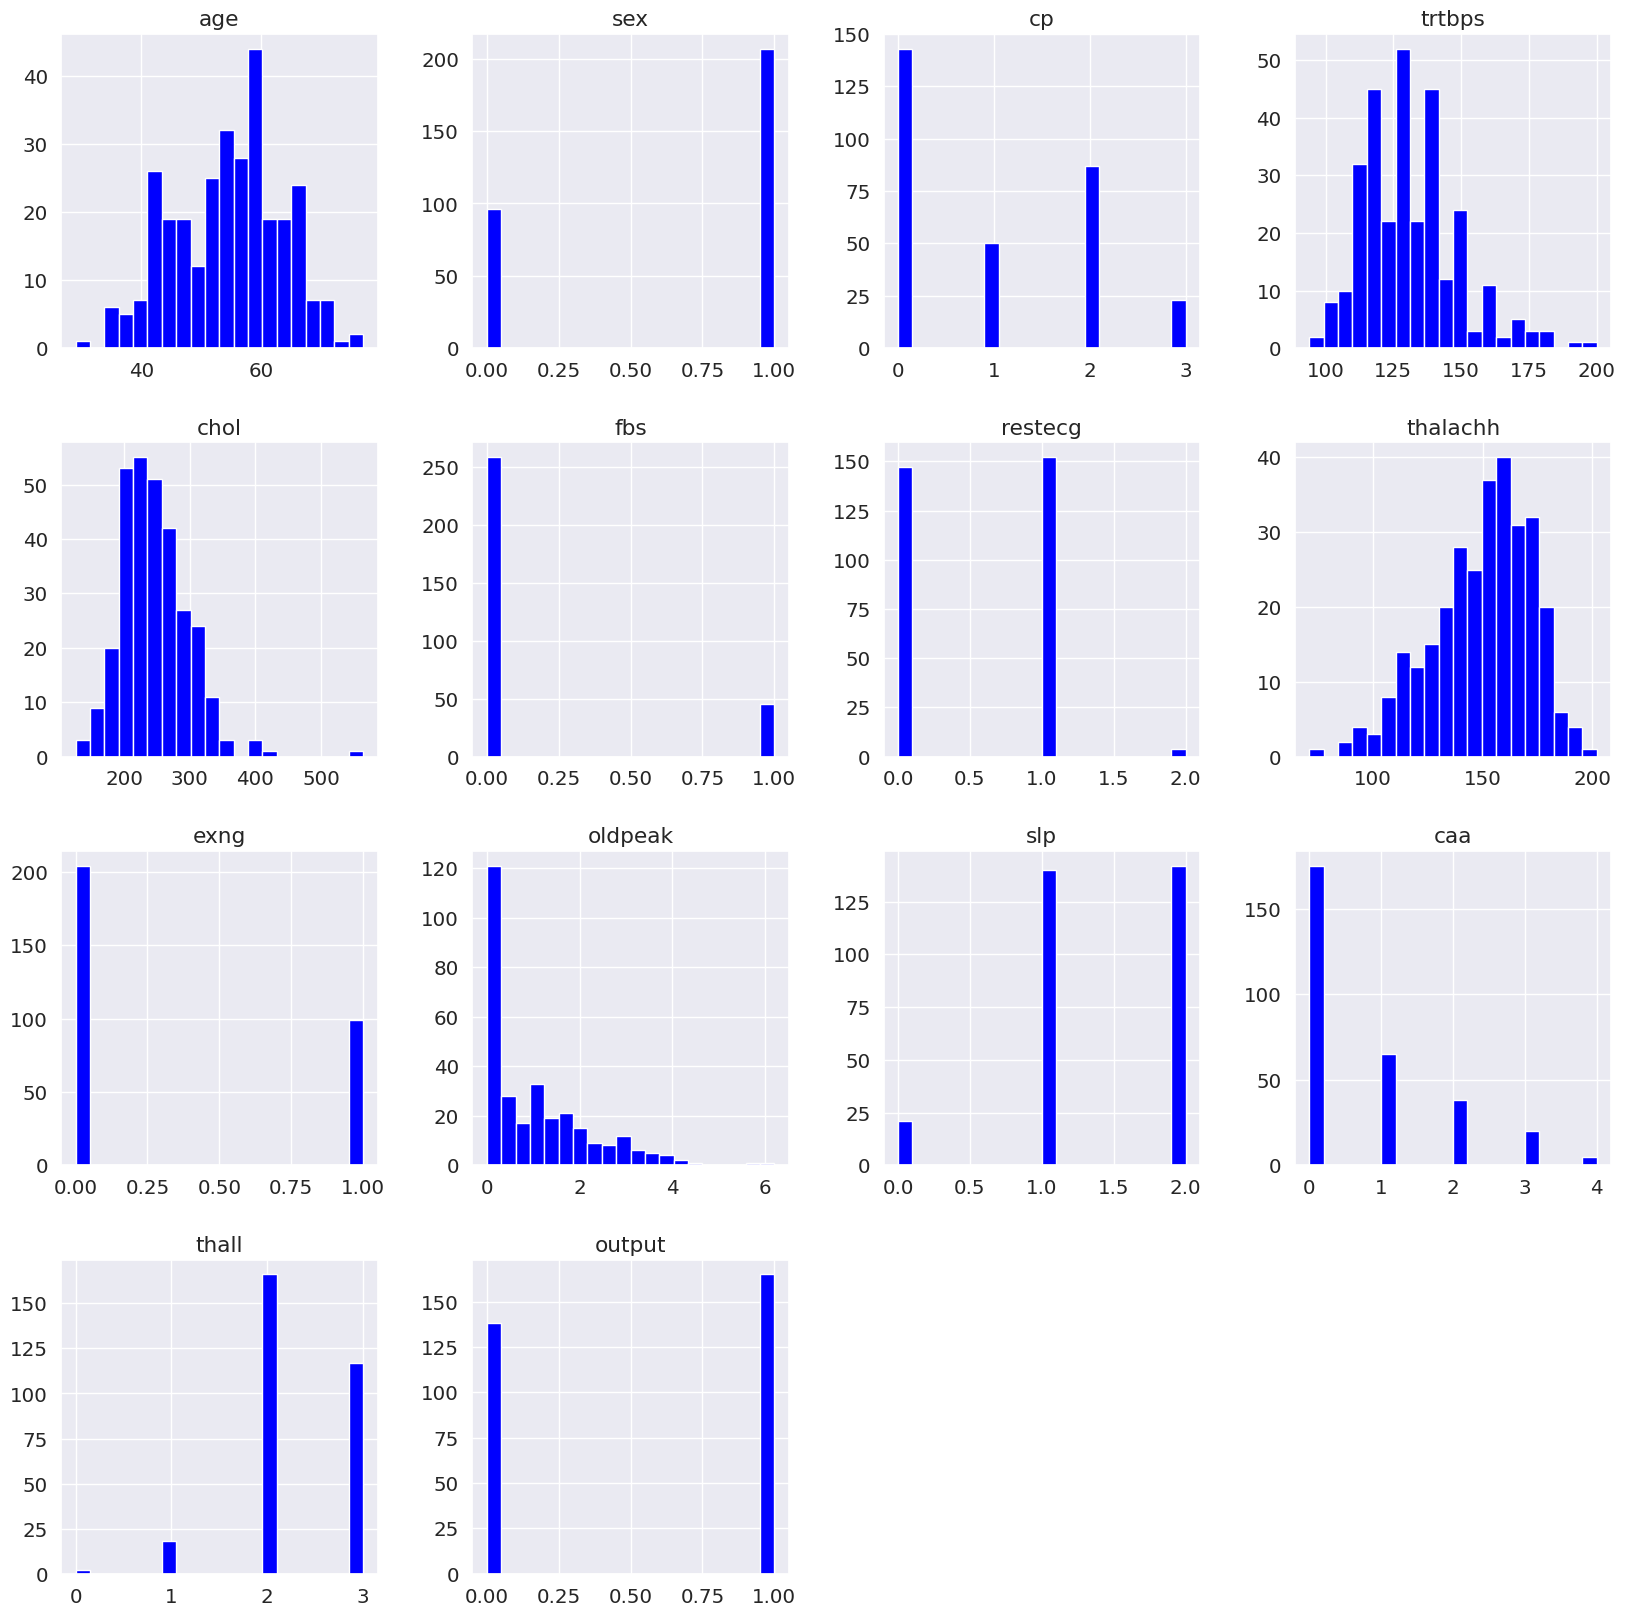

In [ ]:
sns.set(font_scale = 1.3, rc={'figure.figsize':(20,20) } )
eixo = df.hist(bins = 20, color = 'blue')

Visualização Boxplot da coluna de máxima frequência cardíaca observda em relação a coluna target

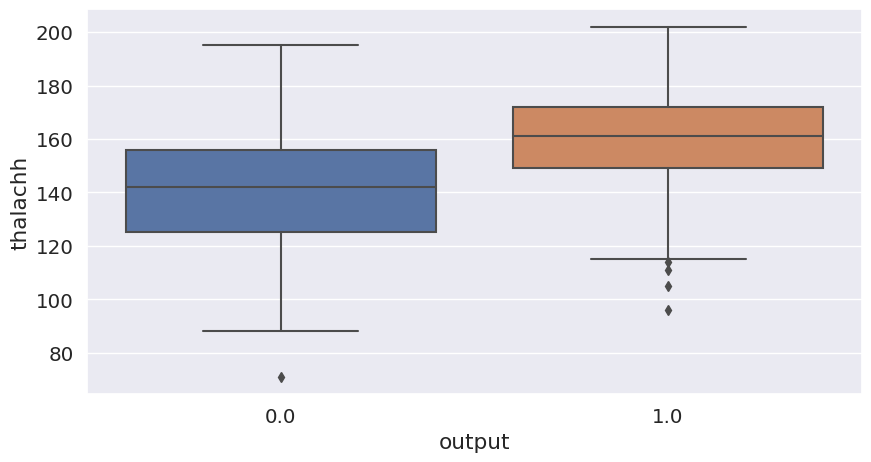

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df, x = 'output', y = 'thalachh');

Visualização Scatterplot de algumas colunas em relação a coluna target

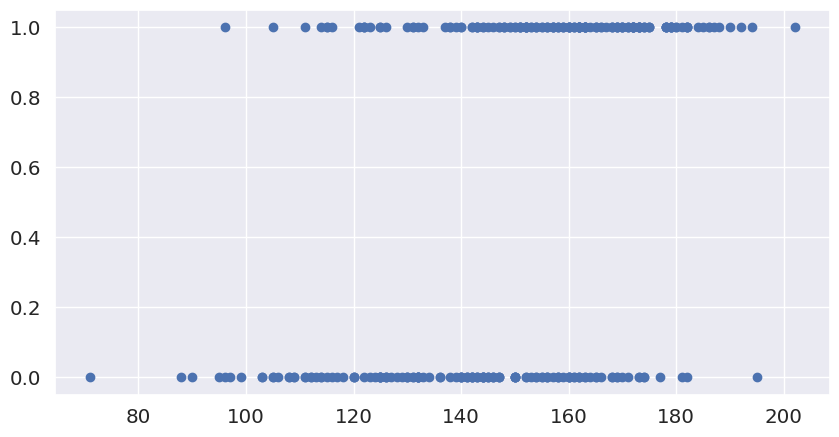

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(data = df, x = 'thalachh', y = 'output');

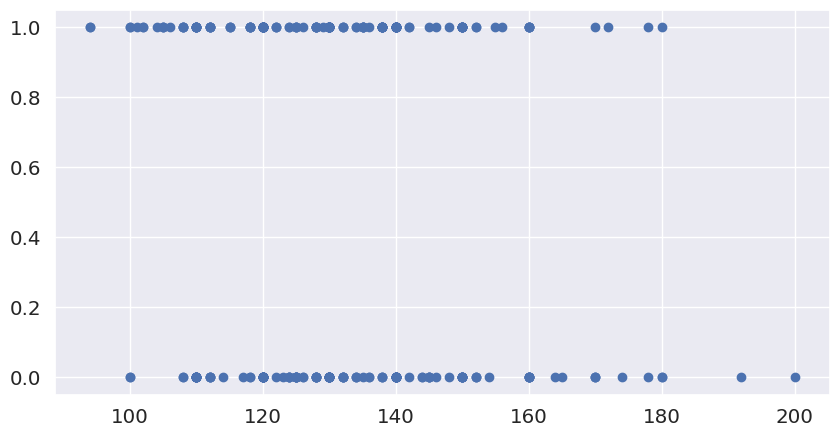

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(data = df, x = 'trtbps', y = 'output');

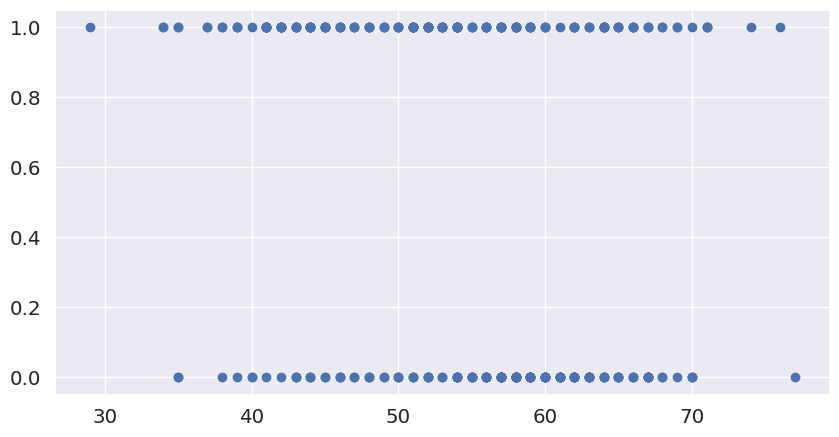

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(data = df, x = 'age', y = 'output');

Separando a coluna target das demais

In [ ]:
var_target = df.iloc[:,13:14]
preditores = df.iloc[:,0:13]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    float64
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    float64
dtypes: float64(5), int64(9)
memory usage: 33.3 KB


Dividindo a base de dados em treino e teste, 80% dos objetos destinados ao treino e 20% dos objetos para teste.

In [ ]:
x_treino, x_teste, y_treino, y_teste =train_test_split(preditores, var_target, test_size = 0.2, random_state = 42)

In [ ]:
df_treino, df_teste = train_test_split(df,test_size=0.2, random_state=42)

In [ ]:
X_treino = df_treino[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']].values.reshape(-1,np.size([['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']]))
X_teste = df_teste[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']].values.reshape(-1,np.size([['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']]))
y_treino = df_treino['output'].values.reshape(-1,1)
y_teste = df_teste['output'].values.reshape(-1,1)

Estimando a regressão logística multivariada

In [ ]:
func_logistica = LogisticRegression(random_state=50, max_iter=10000)
func_logistica.fit(x_treino, y_treino)
#Obtendo os coeficientes do modelo logistico.
[func_logistica.intercept_,func_logistica.coef_]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[array([3.05493324]),
 array([[-0.00692676, -1.40031501,  0.79122845, -0.01590476, -0.00289687,
          0.16794782,  0.4795513 ,  0.01882015, -0.95196012, -0.64821466,
          0.63180051, -0.77518879, -0.91991599]])]

Predições para os dados de treino e teste com o modelo multivariado usando. Utilizando cutoff de 50% com range entre zero e um.

In [ ]:
y_treino_pred_multi_prob = func_logistica.predict_proba(x_treino)[:,1]
y_treino_pred_multi = np.array([1. if i> 0.50 else 0. for i in y_treino_pred_multi_prob])

y_teste_pred_multi_prob = func_logistica.predict_proba(x_teste)[:,1]
y_teste_pred_multi = np.array([1. if i> 0.50 else 0. for i in y_teste_pred_multi_prob])

Média de erro no treino e média de erro no teste

In [ ]:
erro_treino = y_treino_pred_multi != y_treino
erro_teste = y_teste_pred_multi != y_teste

[np.mean(erro_treino), np.mean(erro_teste)]

[0.5200805955877331, 0.513302875571083]

Calculando e mostrando a matriz de confusão

In [ ]:
confusion_matrix(y_teste, y_teste_pred_multi, labels=[1,0])

array([[13, 19],
       [ 1, 28]])

In [ ]:
mtx_conf = mtx_conf.astype(float)
mtx_conf

array([[13., 19.],
       [ 1., 28.]])

Text(0.5, 28.249999999999986, 'Label Predita')

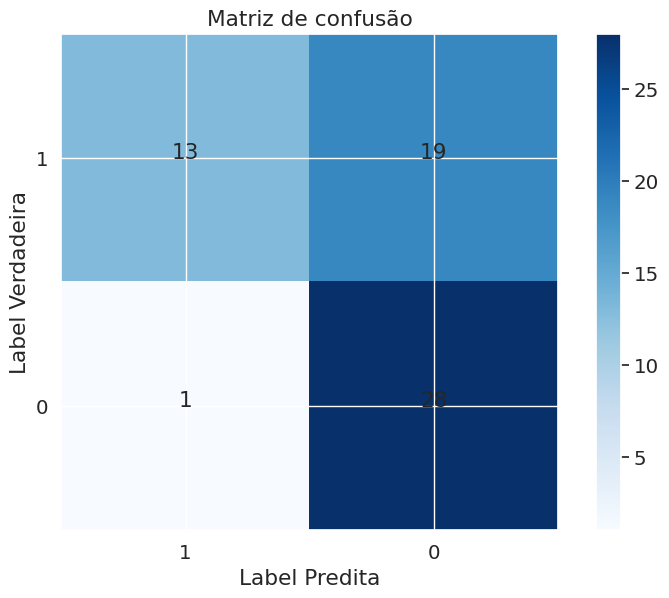

In [ ]:
mtx_conf = confusion_matrix(y_teste, y_teste_pred_multi, labels=[1,0])

plt.figure(figsize = (8,6))
classes = [1, 0]
plt.imshow(mtx_conf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de confusão")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
for i, j in itertools.product(range(mtx_conf.shape[0]), range(mtx_conf.shape[1])):
    plt.text(j, i, format(mtx_conf[i, j], fmt),
             horizontalalignment="center")

plt.tight_layout()
plt.ylabel('Label Verdadeira')
plt.xlabel('Label Predita')

In [ ]:
mtx_conf = metrics.confusion_matrix(y_teste, y_teste_pred_multi, labels=[1,0])

# Apresenta matriz de confusão com as porcentagens
print(f"O modelo previu VP :    {(mtx_conf[0][0] / (mtx_conf[0][0]+mtx_conf[0][1]))*100: .0f}% corretamente.")
print(f"O modelo previu VN : {(mtx_conf[1][1] / (mtx_conf[1][1]+mtx_conf[1][0]))*100: .0f}% corretamente.")
print(f"O modelo previu FP :    {(mtx_conf[1][0] / (mtx_conf[1][0]+mtx_conf[1][1]))*100: .0f}%  incorretamente.")
print(f"O modelo previu FN : {(mtx_conf[0][1] / (mtx_conf[0][1]+mtx_conf[0][0]))*100: .0f}% incorretamente.")





O modelo previu VP :     41% corretamente.
O modelo previu VN :  97% corretamente.
O modelo previu FP :     3%  incorretamente.
O modelo previu FN :  59% incorretamente.


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_teste, y_teste_pred_multi))

              precision    recall  f1-score   support

         0.0       0.60      0.97      0.74        29
         1.0       0.93      0.41      0.57        32

    accuracy                           0.67        61
   macro avg       0.76      0.69      0.65        61
weighted avg       0.77      0.67      0.65        61



Calculando a precisão (Precision) TP/(TP+FP).

In [ ]:
metrics.precision_score(y_teste, y_teste_pred_multi)

0.9285714285714286

Estimando a curva ROC.

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_teste, y_teste_pred_multi_prob)

Text(0.5, 1.0, 'ROC curve')

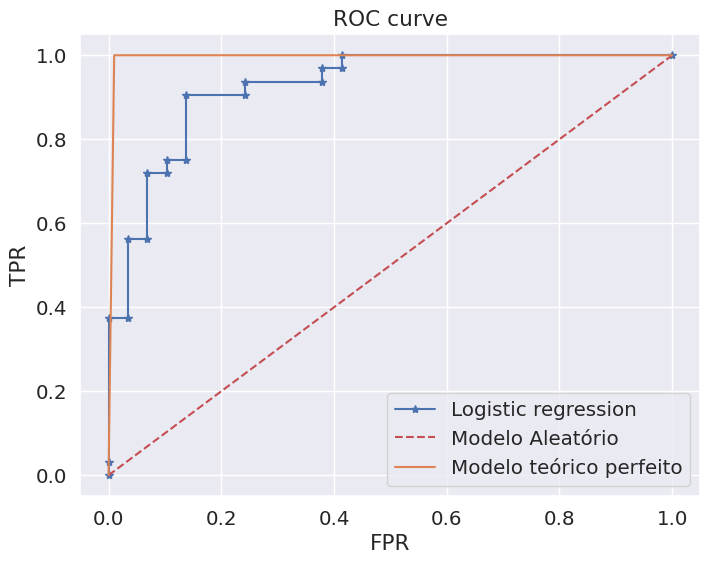

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.plot([0,0.01, 1], [0,1,1])
plt.legend(['Logistic regression', 'Modelo Aleatório','Modelo teórico perfeito'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

##Estimando o AUC.

In [ ]:
metrics.roc_auc_score(y_teste, y_teste_pred_multi_prob)

0.925646551724138

###Usando a curva ROC para achar o melhor ponto de corte para o modelo. Procurei o ponto de corte que possui a maior distância entre a taxa de `Verdadeiros Positivos (VP)` e `Falsos Positivos (FP)`.
​

###Fiz isso na amostra de treino para aplicar em teste.

In [ ]:
optimal_proba_cutoff = sorted(list(zip(np.abs(tpr - fpr), y_treino_pred_multi_prob)), key=lambda i: i[0], reverse=True)[0][1]
optimal_proba_cutoff

y_treino_pred_multi_prob = func_logistica.predict_proba(X_treino)[:,1]
y_treino_pred_multi = np.array([1. if i> optimal_proba_cutoff else 0. for i in y_treino_pred_multi_prob])

y_teste_pred_multi_prob = func_logistica.predict_proba(X_teste)[:,1]
y_teste_pred_multi = np.array([1. if i> optimal_proba_cutoff else 0. for i in y_teste_pred_multi_prob])

erro_treino = y_treino_pred_multi != y_treino
erro_test = y_teste_pred_multi != y_teste

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Média de erro no treino e no teste

In [ ]:
[np.mean(erro_treino), np.mean(erro_test)]

[0.5200805955877331, 0.513302875571083]

Calculo da segunda matriz de confusão usando o melhor ponto de corte

Text(0.5, 28.249999999999986, 'Label Predita')

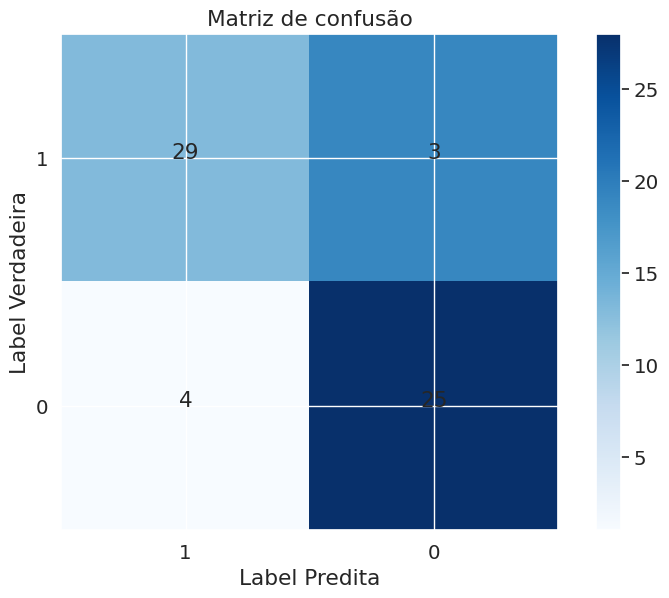

In [ ]:
mtx_conf_2 = confusion_matrix(y_teste, y_teste_pred_multi, labels=[1,0])

plt.figure(figsize = (8,6))
classes = [1, 0]
plt.imshow(mtx_conf_2, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de confusão")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
for i, j in itertools.product(range(mtx_conf.shape[0]), range(mtx_conf.shape[1])):
    plt.text(j, i, format(mtx_conf[i, j], fmt),
             horizontalalignment="center")

plt.tight_layout()
plt.ylabel('Label Verdadeira')
plt.xlabel('Label Predita')

In [ ]:
# Apresenta a segunda matriz de confusão com as porcentagems
print(f"O modelo previu VP - Chance maior de ter ataque cardíaco:    {(mtx_conf_2[0][0] / (mtx_conf_2[0][0]+mtx_conf_2[0][1]))*100: .0f}% das vezes corretamente.")
print(f"O modelo previu VN - Chance maior de não ter ataque cardíaco:     {(mtx_conf_2[1][1] / (mtx_conf_2[1][1]+mtx_conf_2[1][0]))*100: .0f}% das vezes corretamente.")
print(f"O modelo previu FP - Chance maior de ter ataque cardíaco:    {(mtx_conf_2[1][0] / (mtx_conf_2[1][0]+mtx_conf_2[1][1]))*100: .0f}%  das vezes incorretamente.")
print(f"O modelo previu FN - Chance maior de não ter ataque cardíaco:     {(mtx_conf_2[0][1] / (mtx_conf_2[0][1]+mtx_conf_2[0][0]))*100: .0f}% das vezes incorretamente.")

O modelo previu VP - Chance maior de ter ataque cardíaco:     41% das vezes corretamente.
O modelo previu VN - Chance maior de não ter ataque cardíaco:      97% das vezes corretamente.
O modelo previu FP - Chance maior de ter ataque cardíaco:     3%  das vezes incorretamente.
O modelo previu FN - Chance maior de não ter ataque cardíaco:      59% das vezes incorretamente.


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_teste, y_teste_pred_multi))

              precision    recall  f1-score   support

         0.0       0.60      0.97      0.74        29
         1.0       0.93      0.41      0.57        32

    accuracy                           0.67        61
   macro avg       0.76      0.69      0.65        61
weighted avg       0.77      0.67      0.65        61

